In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('bank.csv')

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.shape

(4521, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.job.unique()
print(df.job.unique())
len(df.job.unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


12

In [11]:
df.marital.unique()
print(df.marital.unique())
len(df.marital.unique())

['married' 'single' 'divorced']


3

In [12]:
# Select only categorical data columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate over each categorical column
for column in categorical_columns:
    # Get unique categories in the column
    categories = df[column].unique()
    
    # Print the column name and its unique categories
    print(f"Column: {column}")
    print("Categories:", categories)
    print()

Column: job
Categories: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Column: marital
Categories: ['married' 'single' 'divorced']

Column: education
Categories: ['primary' 'secondary' 'tertiary' 'unknown']

Column: default
Categories: ['no' 'yes']

Column: housing
Categories: ['no' 'yes']

Column: loan
Categories: ['no' 'yes']

Column: contact
Categories: ['cellular' 'unknown' 'telephone']

Column: month
Categories: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

Column: poutcome
Categories: ['unknown' 'failure' 'other' 'success']

Column: y
Categories: ['no' 'yes']



In [13]:
for column in df.columns:
    # Get unique categories in the column
    categories = df[column].unique()
    
    # Print the column name and its unique categories
    print(f"Column: {column}")
    print("Categories:", categories)
    print()

Column: age
Categories: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

Column: job
Categories: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Column: marital
Categories: ['married' 'single' 'divorced']

Column: education
Categories: ['primary' 'secondary' 'tertiary' 'unknown']

Column: default
Categories: ['no' 'yes']

Column: balance
Categories: [ 1787  4789  1350 ...  -333 -3313  1137]

Column: housing
Categories: ['no' 'yes']

Column: loan
Categories: ['no' 'yes']

Column: contact
Categories: ['cellular' 'unknown' 'telephone']

Column: day
Categories: [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]

Column: month
Categories: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov

<Axes: >

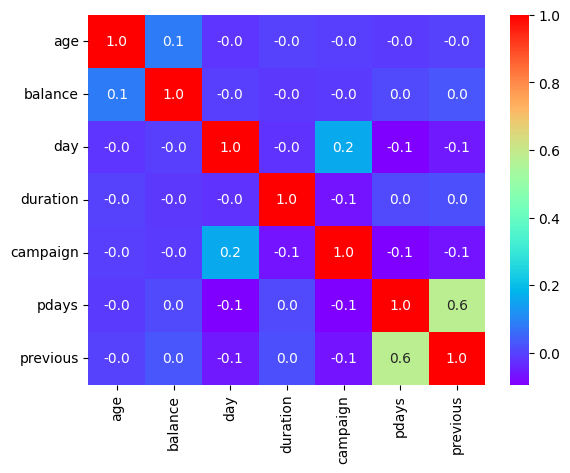

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rainbow', fmt='.1f')

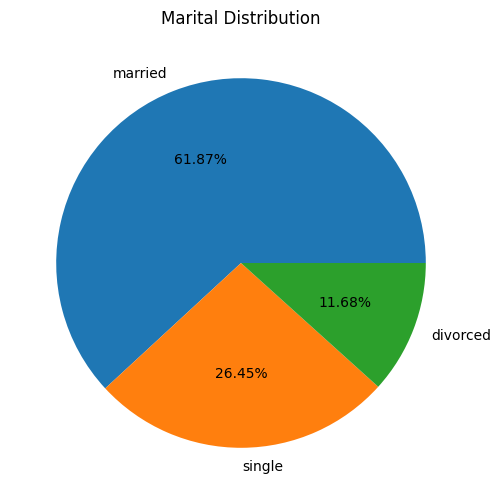

In [15]:
marital=df['marital'].value_counts().reset_index()
marital.columns = ['Marital Status', 'Count']

plt.figure(figsize=(8,6))
plt.title('Marital Distribution')
plt.pie(marital['Count'],labels=marital['Marital Status'],autopct='%1.2f%%')
plt.show()

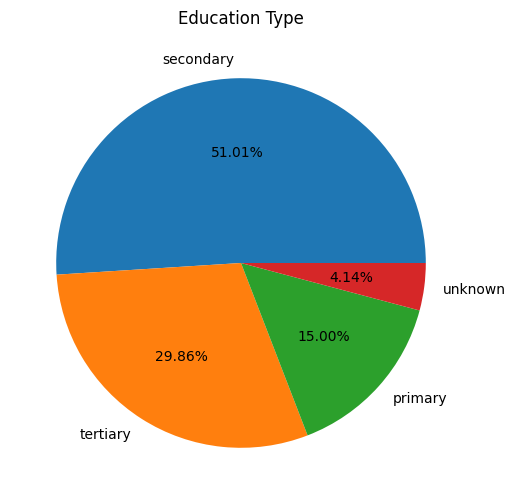

In [16]:
education=df['education'].value_counts().reset_index()
education.columns = ['Type', 'Count']

plt.figure(figsize=(8,6))
plt.title('Education Type')
plt.pie(education['Count'],labels=education['Type'],autopct='%1.2f%%')
plt.show()

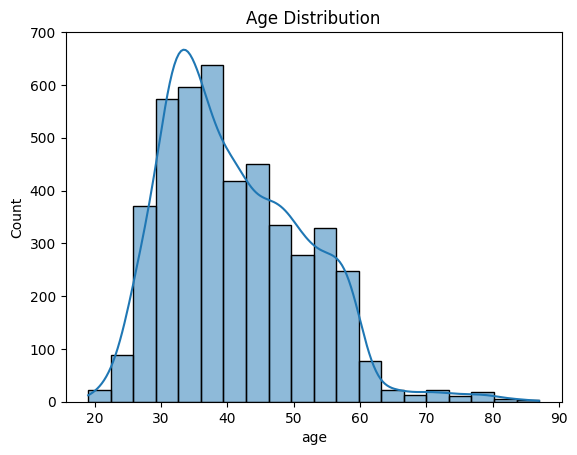

<Figure size 800x600 with 0 Axes>

In [17]:
sns.histplot(df['age'],bins=20,kde=True)
plt.title('Age Distribution')
plt.figure(figsize=(8,6))
plt.show()

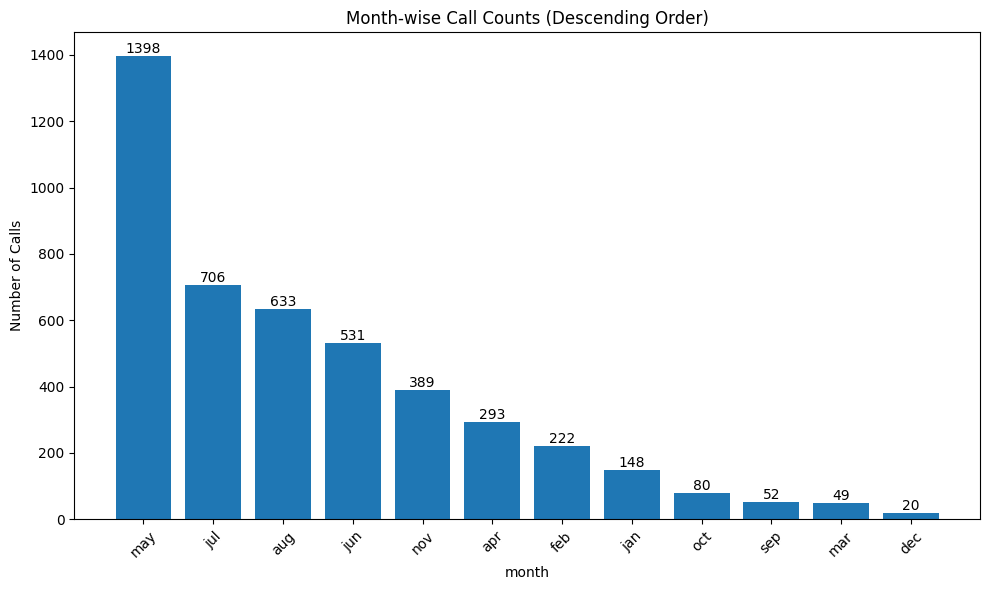

In [18]:
# Assuming you have a DataFrame df with columns 'Month' and 'Calls'

# Aggregate calls by month
monthly_calls = df.groupby('month').size().reset_index(name='Calls')

# Sort the data in descending order by count of calls
monthly_calls = monthly_calls.sort_values(by='Calls', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_calls['month'], monthly_calls['Calls'])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('month')
plt.ylabel('Number of Calls')
plt.title('Month-wise Call Counts (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


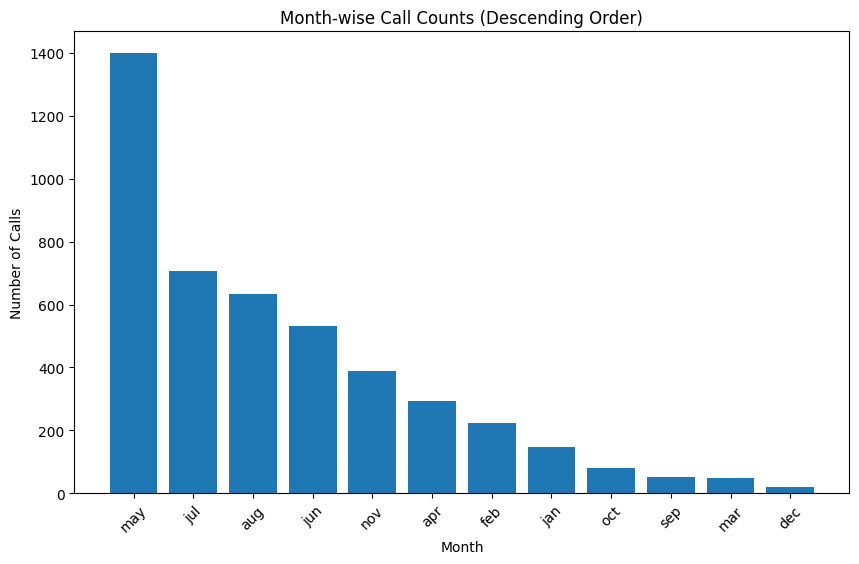

In [19]:
monthly_calls = df.groupby('month').size().reset_index(name='Calls')

# Sort the data in descending order by count of calls
monthly_calls = monthly_calls.sort_values(by='Calls', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_calls['month'], monthly_calls['Calls'])
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Month-wise Call Counts (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

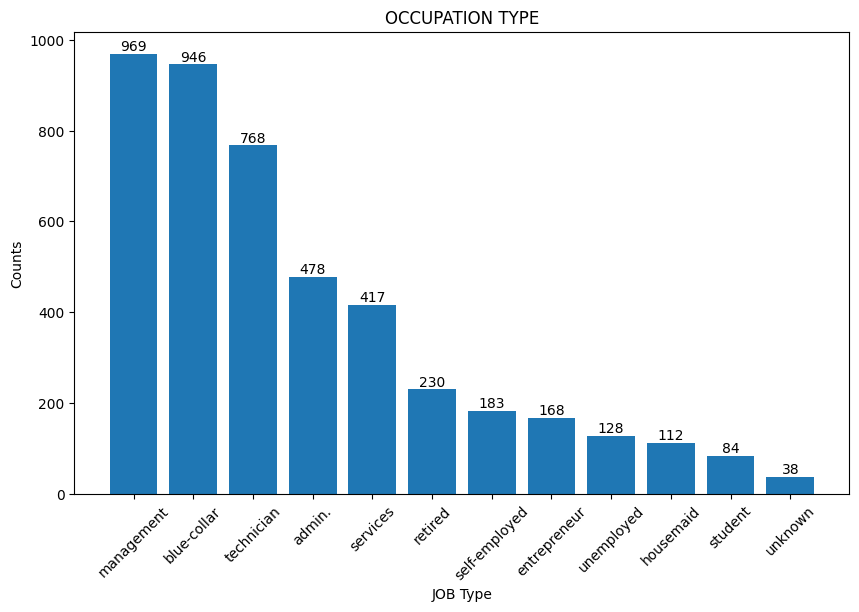

In [30]:
occupation_sales = df.groupby('job').size().reset_index(name='Counts')

occupation_sales = occupation_sales.sort_values(by='Counts', ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(occupation_sales['job'], occupation_sales['Counts'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    
plt.xlabel('JOB Type')
plt.ylabel('Counts')
plt.title('OCCUPATION TYPE')
plt.xticks(rotation=45)
plt.show()

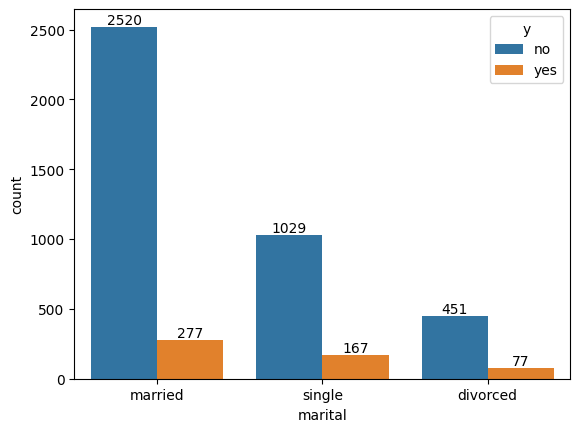

In [31]:
ax = sns.countplot(x='marital',hue='y',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

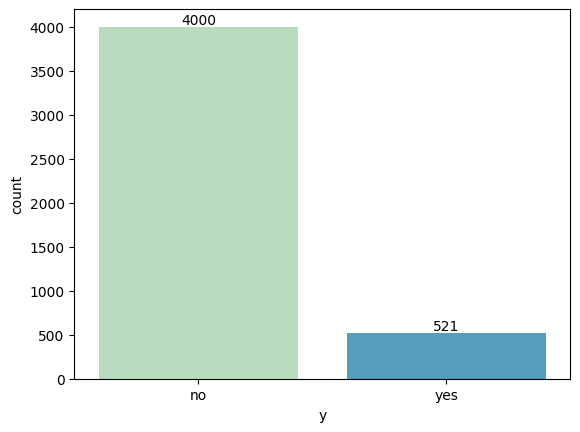

In [35]:
ax = sns.countplot(x='y',data=df,palette='GnBu')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [ ]:
df.drop(['pdays','previous','poutcome','y'],axis=1,inplace=True)

In [40]:
encoder = LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['default']=encoder.fit_transform(df['default'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])



In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,30,10,1,0,0,1787,0,0,0,19,10,79,1
1,33,7,1,1,0,4789,1,1,0,11,8,220,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4
4,59,1,1,1,0,0,1,0,2,5,8,226,1


In [41]:
X=df.drop('default',axis=1)
y=df['default']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [50]:
X_train.shape, X_test.shape

((3616, 12), (905, 12))

In [51]:
y_train.shape, y_test.shape

((3616,), (905,))

In [53]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.9624309392265193


In [54]:
X_pred=model.predict(X_train)
print("Accuracy Score:",accuracy_score(y_train,X_pred))

Accuracy Score: 1.0


<Axes: >

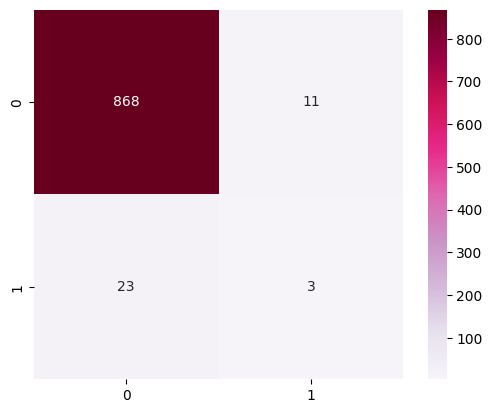

In [55]:
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,square=True,fmt='d',cmap='PuRd')

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       879
           1       0.21      0.12      0.15        26

    accuracy                           0.96       905
   macro avg       0.59      0.55      0.57       905
weighted avg       0.95      0.96      0.96       905

